# Telecom Churn Prediction
<hr>
<br>

<p align="justify">Pelanggan adalah sumber daya yang paling penting bagi setiap perusahaan atau bisnis. Bagaimana jika pelanggan meninggalkan perusahaan karena biaya tinggi, penawaran pesaing yang lebih baik, layanan pelanggan yang buruk, atau sesuatu yang tidak diketahui? Oleh karena itu, tingkat churn pelanggan adalah salah satu metrik penting bagi perusahaan untuk mengevaluasi kinerja mereka. </p>


<p align="justify">Tingkat churn pelanggan adalah KPI untuk memahami pelanggan yang pergi. Tingkat churn mewakili persentase pelanggan perusahaan kehilangan semua pelanggan pada awal interval. </p>

# **STEP # 1 INSTALL AND IMPORT REQUIRED LIBRARIES/MODULES**

In [ ]:
# Install required libraries
!pip install -U kaleido
!pip install adjustText

In [ ]:
# Importing libraries
import numpy as np 
import pandas as pd 
from math import * 
import random
from sklearn.utils import shuffle
import itertools
import io
import os

# Modeling & Evaluation
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py 
import plotly.express as px
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 
import matplotlib.lines as mlines
from adjustText import adjust_text
from wordcloud import WordCloud

# Constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

# Set up
sns.set_style('whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **Data Description**

### Dataset, Features and Target value
Sumber : [IBM Sample Dataset](https://drive.google.com/drive/folders/1BlgOeYej99z-CWLBhwbLaKoYHVD7N5Su?usp=sharing)

<p align="justify">Di sini, IBM menyediakan data pelanggan untuk industri Telecom untuk memprediksi pelanggan churn berdasarkan informasi demografis, penggunaan, dan akun. Tujuan utama di sini adalah untuk menganalisis perilaku pelanggan churn dan mengembangkan strategi untuk meningkatkan retensi pelanggan.</p>

<p align="justify">Asumsi — Di sini, sumber data belum memberikan informasi apa pun terkait waktu; Jadi kita bisa berasumsi bahwa semua catatan khusus untuk bulan tertentu.</p>

Dataset memiliki informasi berkaitan pada,

#### **Demographic**:

- Gender - Male / Female <br>
- Age range - In terms of Partner, Dependent and Senior Citizen

#### **Services**:

- Phone service - If customer has Phone service, then services related to Phone like;
    - Multiline Phone service
- Internet Service - If customer has Internet service, then services related to Internet like;
    - Online security
    - Online backup
    - Device protection
    - Tech support
    - Streaming TV
    - Streaming Movies

#### **Account type**:

- Tenure - How long customer is with the company?
- Contract type - What kind of contract they have with a company? Like
    - Monthly bases
    - On going bases - If on going bases, then One month contract or Two year contract
- Paperless billing - Customer is paperless billion option or not?
- Payment method - What kind of payment method customer has?
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

#### **Usage**:

- Monthly charges
- Total charges

#### **Target**:

- Churn - Whether customer left the company or still with the company?

# **STEP # 2 LOAD DATASET**

In [ ]:
# Reading the dataset
telco_churn = pd.read_excel('Telco_customer_churn.xlsx')
# The sample observation units of the data set were accessed.
telco_churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
# Feature information
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# **STEP # 3 DATA PREPROCESSING**

Langkah-langkah Preprocessing Data terdiri dari:
1.   Handling Missing Values
2.   Data Transformation



In [ ]:
# Checking missing / NULL values
telco_churn.isnull().any()

CustomerID           False
Count                False
Country              False
State                False
City                 False
Zip Code             False
Lat Long             False
Latitude             False
Longitude            False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Tenure Months        False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Monthly Charges      False
Total Charges        False
Churn Label          False
Churn Value          False
Churn Score          False
CLTV                 False
Churn Reason          True
dtype: bool

In [ ]:
# Duplicate value check
telco_churn.duplicated().any()

False

In [ ]:
# Fill in the Churn Reason column that has a missing value with 'No Reason'
telco_churn['Churn Reason'] = telco_churn['Churn Reason'].fillna('No Reason')
telco_churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,No Reason
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,No Reason
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,No Reason
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,No Reason


In [ ]:
# Convert data type object of Total Charges column
telco_churn['Total Charges'] = pd.to_numeric(telco_churn['Total Charges'], errors='coerce')

In [ ]:
# Check feature information again
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# Display describe of data that has numeric value
telco_churn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


Dari Summary Descriptive Statistic data diatas yang memiliki tipe numerik dapat disimpulkan:
1.   Pada variabel Tenure Months memiliki nilai minimum 0 bulan dan nilai maksimum nya sebesar 72 bulan
2.   Pada variabel Monthly Charges memiliki nilai minimum 18.25 dolar dan nilai maksmimum nya sebesar 118.75 dolar
3.   Pada variabel Total Charges memiliki nilai minimum 18.80 dolar dan nilai maksmimum nya sebesar 8684 dolar
4.   Pada variabel churn value memiliki nilai 0 = Not Churn dan 1 = Churn
5.   Pada variabel churn score memiliki nilai minimum 5 dan nilai maksimum nya sebesar 100
6.   Pada variabel CLTV memiliki nilai minimum 2003 dan nilai maksimum nya 6500

Berdasarkan analisis deskriptif kolom numerik, rata-rata masa kerja, rata-rata biaya bulanan dan total biaya pelanggan masing-masing adalah 32 bulan, 64 dolar dan 2282 dolar.


In [ ]:
# Display describe of data that has categorical value
telco_churn.describe(include='object')

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,3,2,4,2,21
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No Reason
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3088,3095,3473,2810,2785,3875,4171,2365,5174,5174


Dari Summary Descriptive Statistic data diatas yang memiliki tipe object dapat disimpulkan:
1.   Pada variabel Customer Id memiliki 7043 data unique
2.   Pada variabel Country dan State hanya memiliki 1 data unique, berarti kita bisa memutuskan untuk tidak menggunakan variabel Country dan State sebagai feature karena nilai yang dimiliki konstan hanya memiliki 1 nilai saja
3.   Pada variabel City memiliki 1129 data unique
4.   - Variabel Gender memiliki 2 value Female dan Male
     - Variabel Senior Citizen, Partner, Dependents, Phone Services, Paperless Billing memiliki 2 nilai No dan Yes
     - Variabel Multiple Lines memiliki 3 nilai No, No Phone Service dan Yes. Dari data diatas kita bisa membuat menjadi 2 kategori. 0 = (No, dan No Phone Service), 1 = Yes
     - Variabel Internet Service memiliki 3 nilai DSL, Fiber Optic, dan No
     - Variabel Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies,  memiliki 3 nilai No, No Internet Service, Yes. Dari data diatas kita bisa membuat menjadi 2 kategori. 0 = (No, dan No Internet Service), 1 = Yes
     - Variabel Contract memiliki 3 nilai One year, Two year, Month-to-Month
     - Variabel Payment Method Type memiliki 4 nilai Mailed check, Electronic check, Credit card (automatic), Bank transfer (automatic). Dari data diatas kita bisa membuat menjadi 3 kategori. 0 = Bank transfer (automatic), 1 = Credit card (automatic), 2 = Mailed check dan Electronic check

In [ ]:
# Drop unnecessary column 
telco_churn = telco_churn.drop(['Count','Country','State','Churn Label'], axis=1)
telco_churn

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,No Reason
7039,6840-RESVB,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,No Reason
7040,2234-XADUH,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,No Reason
7041,4801-JZAZL,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,No Reason


In [ ]:
# Function to do Data Transformation
def Data_transformation(telco_churn):
    ''' Rename column names and transformed into proper format and return 
    dataframe '''
    df_telco_churn = telco_churn.copy()
    
    df_telco_churn.rename(columns={'Zip Code':'ZipCode',
                                  'Lat Long':'LatLong',
                                  'Senior Citizen':'SeniorCitizen',
                                  'Tenure Months':'TenureMonths',
                                  'Phone Service':'PhoneService',
                                  'Multiple Lines':'MultipleLines',
                                  'Internet Service':'InternetService',
                                  'Online Security':'OnlineSecurity',
                                  'Online Backup':'OnlineBackup',
                                  'Device Protection':'DeviceProtection',
                                  'Tech Support':'TechSupport',
                                  'Streaming TV':'StreamingTV',
                                  'Streaming Movies':'StreamingMovies',
                                  'Paperless Billing':'PaperlessBilling',
                                  'Payment Method':'PaymentMethod',
                                  'Monthly Charges':'MonthlyCharges',
                                  'Total Charges':'TotalCharges',
                                  'Churn Value':'Churn',
                                  'Churn Score':'ChurnScore',
                                  'Churn Reason':'ChurnReason',
                                  }
              ,inplace=True)


    # Data preprocessing
    cities = telco_churn['City'].unique()
    inverse_cities_map = {val:i for i,val in enumerate(cities)}
    churn_reasons = telco_churn['Churn Reason'].unique()
    inverse_churn_reasons_map = {val:i for i,val in enumerate(churn_reasons)}

    df_telco_churn['City'] = telco_churn['City'].map(inverse_cities_map)
    df_telco_churn['ChurnReasonType'] = telco_churn['Churn Reason'].map(inverse_churn_reasons_map)
    df_telco_churn['SeniorCitizen'] = df_telco_churn.SeniorCitizen.map({'Yes':1,'No':0})
    df_telco_churn['Partner'] = df_telco_churn.Partner.map({'Yes':1,'No':0})
    df_telco_churn['Dependents'] = df_telco_churn.Dependents.map({'Yes':1,'No':0})
    df_telco_churn['PhoneService'] = df_telco_churn.PhoneService.map({'Yes':1,'No':0})
    df_telco_churn['MultipleLines'] = df_telco_churn.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
    df_telco_churn['InternetServiceType'] = df_telco_churn.InternetService.map({'DSL':1,'Fiber optic':1,'No':0})
    df_telco_churn['OnlineSecurity'] = df_telco_churn.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['OnlineBackup'] = df_telco_churn.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['DeviceProtection'] = df_telco_churn.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['TechSupport'] = df_telco_churn.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['StreamingTV'] = df_telco_churn.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['StreamingMovies'] = df_telco_churn.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_telco_churn['PaperlessBilling'] = df_telco_churn.PaperlessBilling.map({'Yes':1,'No':0})
    df_telco_churn['PaymentMethodType'] = df_telco_churn.PaymentMethod.map({'Mailed check':2, 
                                                                            'Electronic check':2,
                                                                            'Credit card (automatic)':1,
                                                                            'Bank transfer (automatic)':0})
    df_telco_churn['IsContracted'] = df_telco_churn.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    df_telco_churn.loc[df_telco_churn['TotalCharges'].isnull()==True,'TotalCharges'] = df_telco_churn['MonthlyCharges'] * df_telco_churn['TenureMonths']
    
    return df_telco_churn

In [ ]:
# Apply Data Transformation Function
df_telco_churn = Data_transformation(telco_churn)
df_telco_churn.head()

,CustomerID,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,...,MonthlyCharges,TotalCharges,Churn,ChurnScore,CLTV,ChurnReason,ChurnReasonType,InternetServiceType,PaymentMethodType,IsContracted
0,3668-QPYBK,0,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,0,0,0,...,53.85,108.15,1,86,3239,Competitor made better offer,0,1,2,0
1,9237-HQITU,0,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,0,0,1,...,70.70,151.65,1,67,2701,Moved,1,1,2,0
2,9305-CDSKC,0,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,0,0,1,...,99.65,820.50,1,86,5372,Moved,1,1,2,0
3,7892-POOKP,0,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,0,1,1,...,104.80,3046.05,1,84,5003,Moved,1,1,2,0
4,0280-XJGEX,0,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,0,0,1,...,103.70,5036.30,1,89,5340,Competitor had better devices,2,1,0,0


# **STEP # 4 EXPLORATORY DATA ANALYSIS**

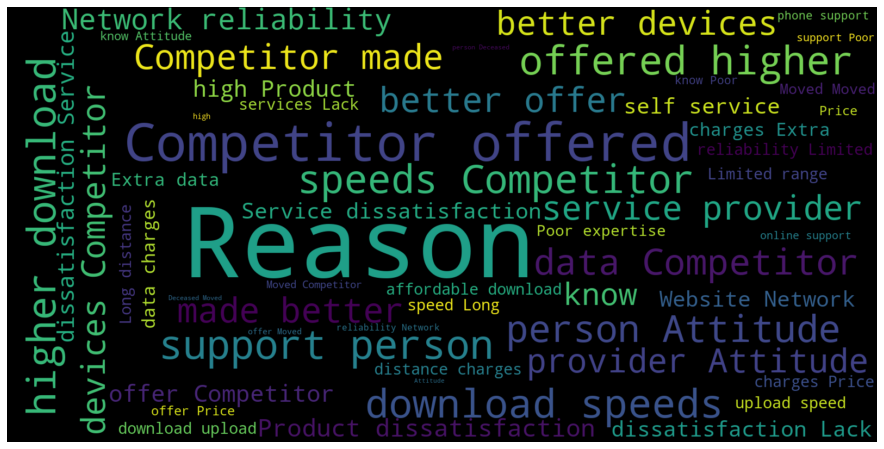

In [ ]:
# Visualization wordclouds of Churn Reason
churn_reason = list(df_telco_churn['ChurnReason'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=180, max_words=150)\
.generate(" ".join(churn_reason))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
fig = plt.gcf()
plt.show()

**Dari analisis di atas, pelanggan churn cenderung karena alasan**
1. Ditawarkan pelayanan yang lebih tinggi oleh kompetitor
2. Ditawarkan pelayanan yang lebih cepat oleh kompetitor
3. Kurangnya pelayanan baik dari jasa atau produk yang diberikan
4. Kekecewaan dalam pelayanan dan produk yang diberikan
5. Adanya biaya data tambahan
6. Adanya kendala kurangnya/adanya limit pada jaringan
7. Kendala jarak yang jauh
8. Keahlian yang buruk
9. Pelayanan yang mendukung secara online oleh kompetitor
10. Pelayanan dengan attitude yang kurang baik

In [ ]:
# Define category variables
category_cols = ['Gender','Partner','Dependents','SeniorCitizen','PhoneService',
                'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'IsContracted','Contract','PaperlessBilling','PaymentMethod']


# Define numerical variables
numeric_cols = ['TenureMonths','MonthlyCharges','TotalCharges','CLTV','ChurnScore']


# Define target
target_col = 'Churn'


# Spliting categorical columns into Nominal and Binary columns
nominal_cols = ['Gender','InternetService','PaymentMethod','Contract']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling',
               'InternetServiceType','IsContracted']

In [ ]:
# Function to generate boxplot for check outlier
def Generate_boxplot_outlier(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

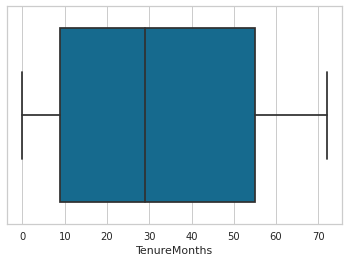

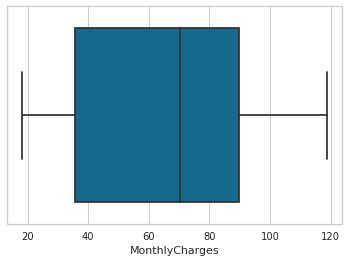

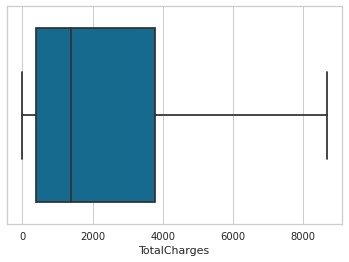

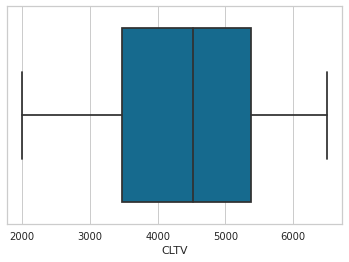

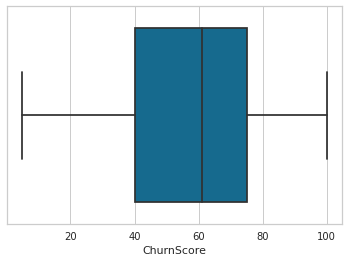

In [ ]:
# Apply generate boxplot outlier of each numeric columns
for i in numeric_cols:
    Generate_boxplot_outlier(df_telco_churn,i)

Grafik plot kotak menunjukkan bahwa tidak ada kolom numerik yang memiliki outlier.

In [ ]:
# Function to generate bargraph for calculate churn rate 
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width = 0.75, color=color, alpha = 0.6) 
    # Stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i,v+0.05,str(round((v*100),2))+'%',fontsize=13,ha='center')
    
    plt.show()

# **=== > Calculate Churn Rate**

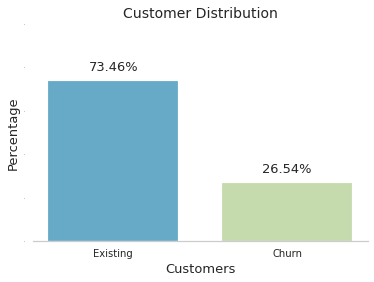


======= Churn Rate =========
0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [ ]:
# Visualization bar graph of Churn 
Churn_rate = df_telco_churn['Churn'].value_counts() / df_telco_churn.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print("\n======= Churn Rate =========")
print(Churn_rate)

**Tingkat churn perusahaan telekomunikasi adalah sekitar 26%**, Artinya sekitar 26% pelanggan meninggalkan perusahaan selama interval tertentu.

# **=== > Distribution of features as per Churn**

# Distribution of categorical and binary variables

In [ ]:
def Create_label_data(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2, bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%', ha = 'center'
                    , fontsize = 13)
            
            
def Generate_dist_graph(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature, y='Percentage', data = feature_summary
                              , col=distribution_col, kind='bar', aspect = 0.8
                              , palette = plotColor, alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        for ax1, ax2 in plt_cat.axes:
            Create_label_data(ax1)
            Create_label_data(ax2)
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()

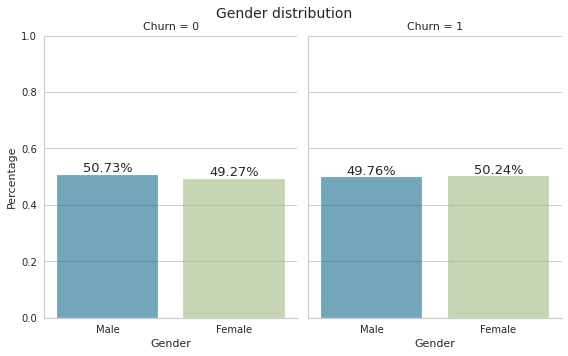

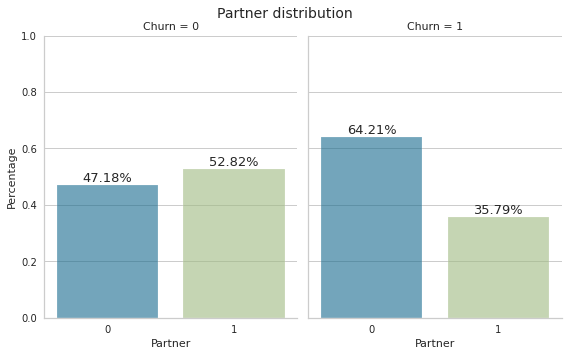

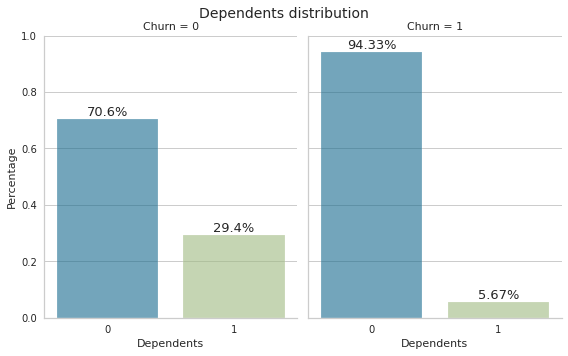

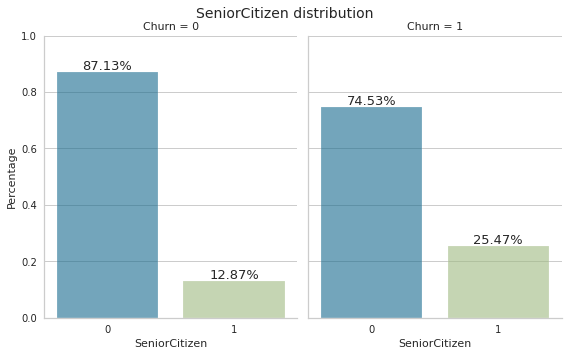

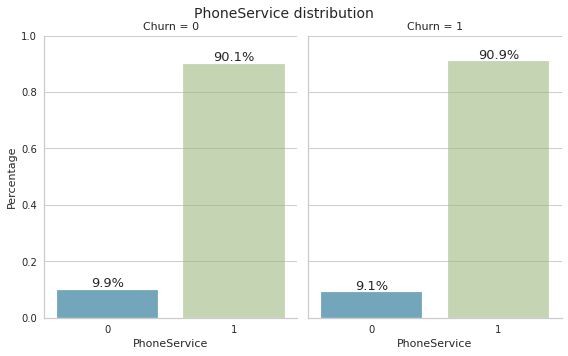

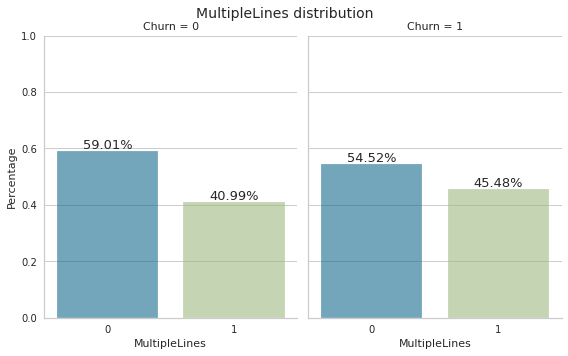

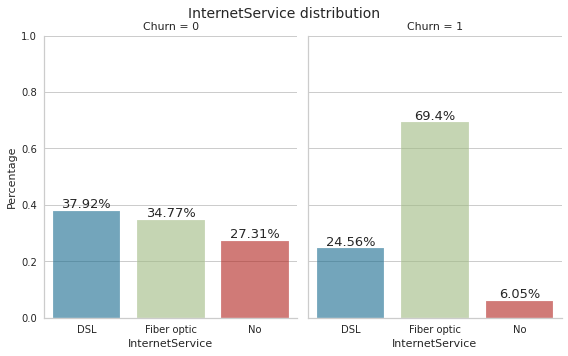

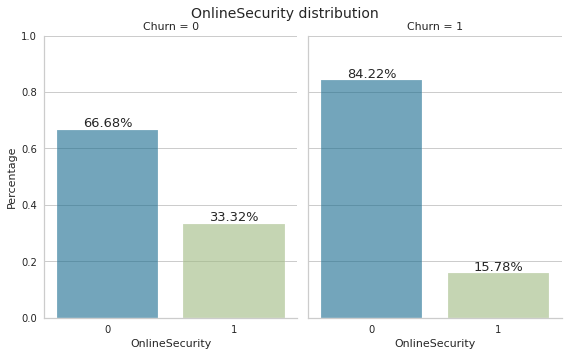

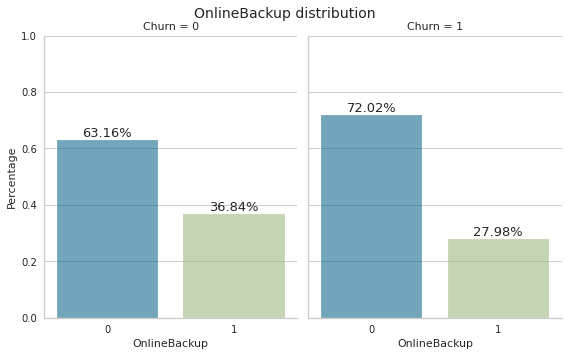

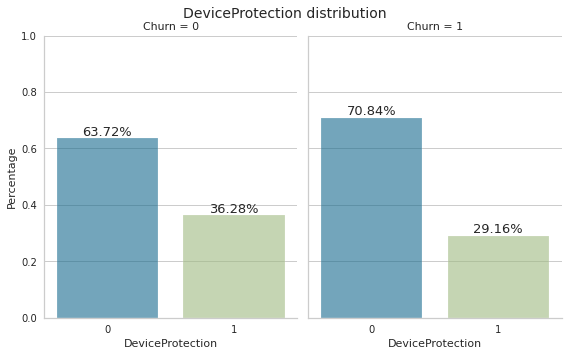

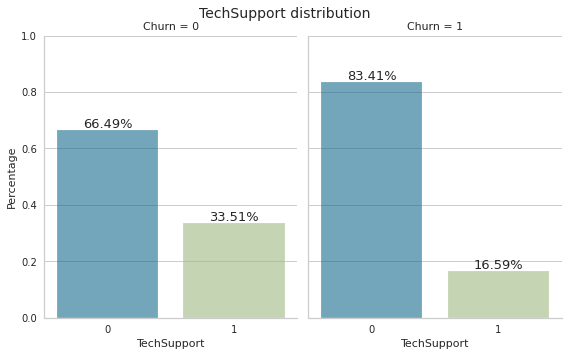

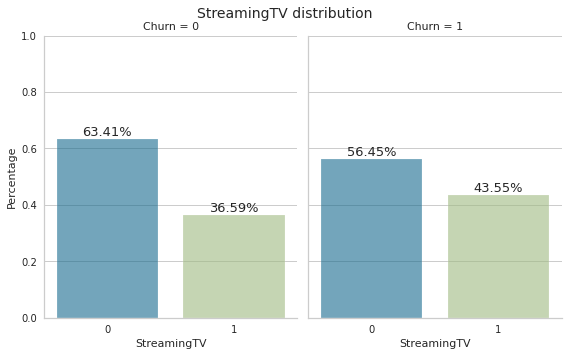

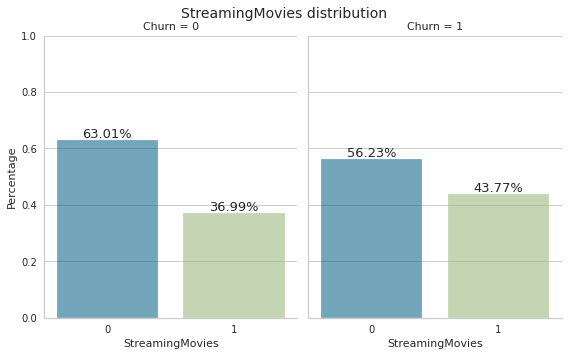

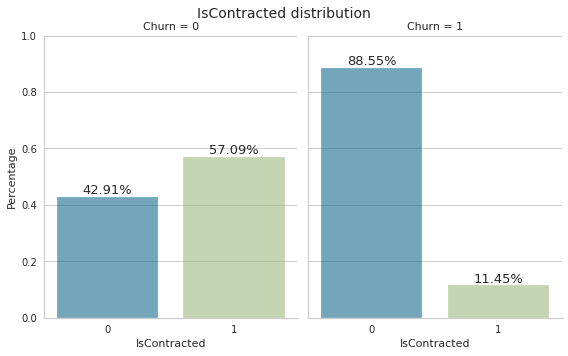

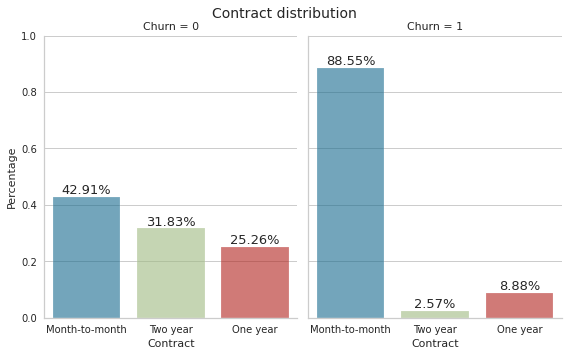

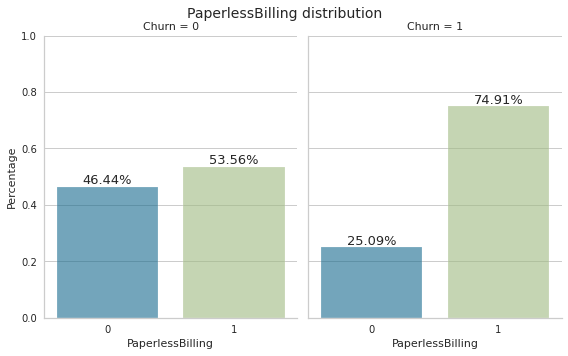

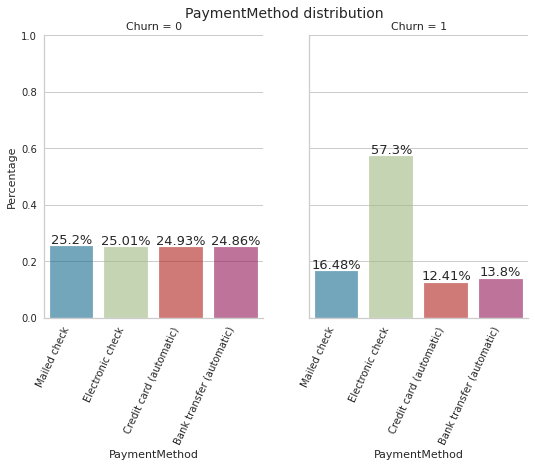

In [ ]:
# Apply generate distribution graph of each categorical columns
churn_summary = df_telco_churn.groupby('Churn')
Generate_dist_graph(churn_summary, category_cols, 'Churn')

**Dari analisis di atas, pelanggan churn cenderung**

- Tidak memiliki pasangan dan Tanggungan; berarti cenderung lajang. 
- Memiliki layanan internet dan khususnya serat optik 
- Tidak memiliki layanan keamanan online, layanan cadangan online, layanan perlindungan perangkat, layanan dukungan teknis 
- Memiliki layanan streaming TV dan film streaming 
- Memiliki kontrak berbasis bulanan 
- Memiliki layanan penagihan tanpa kertas 
- Memiliki pembayaran cek elektronik metode

# **=== > Tenure vs Churn Distribution**

In [ ]:
def Numerical_distribution(df_telco_churn,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,12))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_telco_churn[feature], color = 'g', shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_telco_churn.loc[(df_telco_churn['Churn']==1),feature], color = 'g'
                     , shade = True, label='Chrun')

    ax = sns.kdeplot(df_telco_churn.loc[(df_telco_churn['Churn']==0) ,feature], color = 'b'
                     , shade = True, label='No chrun')
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

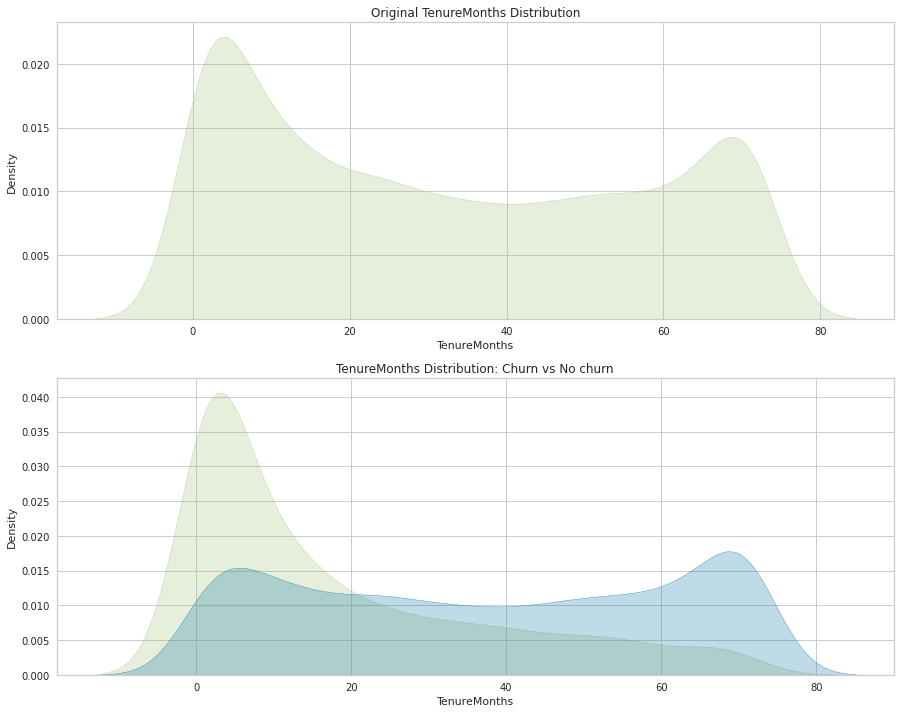

In [ ]:
Numerical_distribution(df_telco_churn,'TenureMonths')

# **=== > MonthlyCharges vs Churn Distribution**

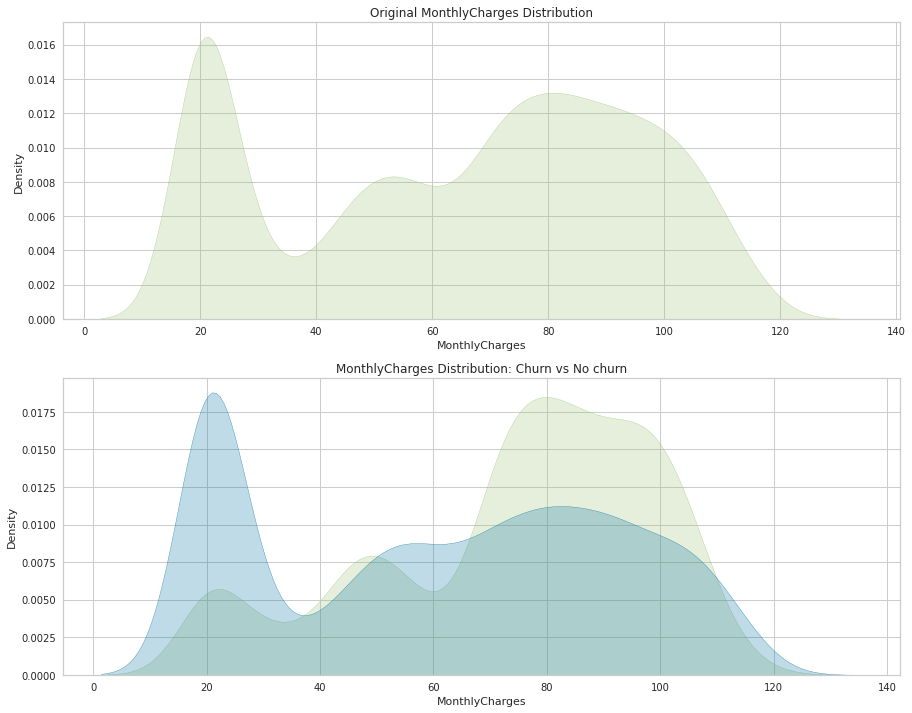

In [ ]:
Numerical_distribution(df_telco_churn,'MonthlyCharges')

# **=== > TotalCharges vs Churn Distribution**

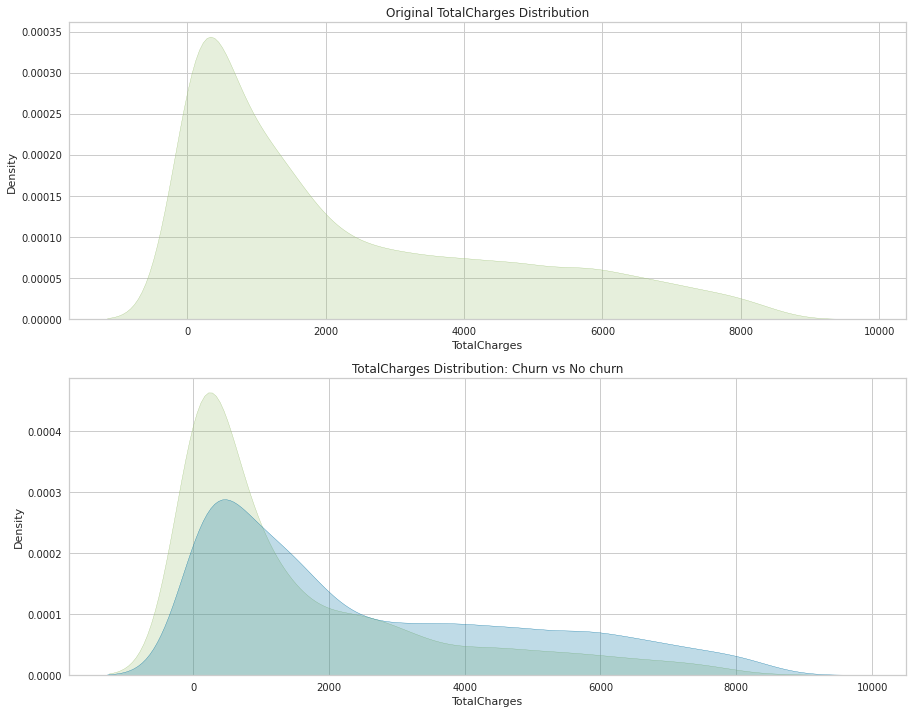

In [ ]:
Numerical_distribution(df_telco_churn, 'TotalCharges')

**Dari distribusi di atas, pelanggan churn adalah**

- Lebih mungkin untuk meninggalkan perusahaan yang masa kerjanya kurang dari satu tahun 
- Lebih mungkin untuk memiliki lebih dari 65 dolar biaya bulanan

# **=== > Cluster Analysis**

Mari kita periksa apakah ada hubungan antara Tenure dan MonthlyCharges.

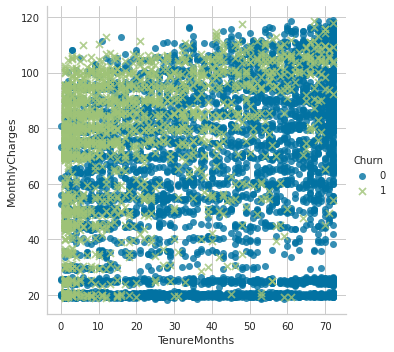

In [ ]:
sns.lmplot(x='TenureMonths',y='MonthlyCharges',data=df_telco_churn,
           hue='Churn',fit_reg=False,markers=["o", "x"],palette= plotColor)
plt.show()

**Dari hasil analisa, terdapat beberapa cluster berdasarkan Tenure dan Monthly Charges.**

Mari kita terapkan algoritma cluster K-means untuk melihat cluster. Sebelum meneruskan data ke algo K-means, perlu dilakukan normalisasi Tenure dan Biaya Bulanan.

In [ ]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)
    
# Normalized Tenure Months and MonthlyCharges
df_telco_churn['Tenure_norm'] = Normalize_feature(df_telco_churn[['TenureMonths']])
df_telco_churn['MonthlyCharges_norm'] = Normalize_feature(df_telco_churn[['MonthlyCharges']])
df_telco_churn.head()

,CustomerID,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,...,Churn,ChurnScore,CLTV,ChurnReason,ChurnReasonType,InternetServiceType,PaymentMethodType,IsContracted,Tenure_norm,MonthlyCharges_norm
0,3668-QPYBK,0,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,0,0,0,...,1,86,3239,Competitor made better offer,0,1,2,0,-1.236724,-0.362660
1,9237-HQITU,0,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,0,0,1,...,1,67,2701,Moved,1,1,2,0,-1.236724,0.197365
2,9305-CDSKC,0,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,0,0,1,...,1,86,5372,Moved,1,1,2,0,-0.992402,1.159546
3,7892-POOKP,0,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,0,1,1,...,1,84,5003,Moved,1,1,2,0,-0.177995,1.330711
4,0280-XJGEX,0,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,0,0,1,...,1,89,5340,Competitor had better devices,2,1,0,0,0.677133,1.294151


In [ ]:
def Elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

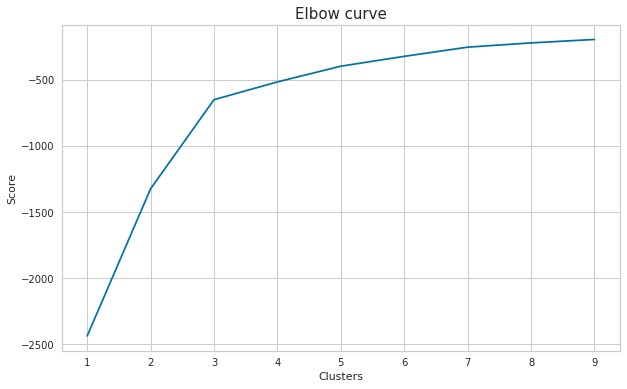

In [ ]:
# Checking number of clusters
Elbow_curve(df_telco_churn[df_telco_churn.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

Dari **Kurva Elbow**, 3 merupakan hasil paling efisien.

In [ ]:
def Kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 
    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    plt.title(chart_title,fontsize=15)
    plt.show()
    return kmeans.fit_predict(df_telco_churn[df_telco_churn.Churn==1][[x_title+'_norm', y_title +'_norm']])

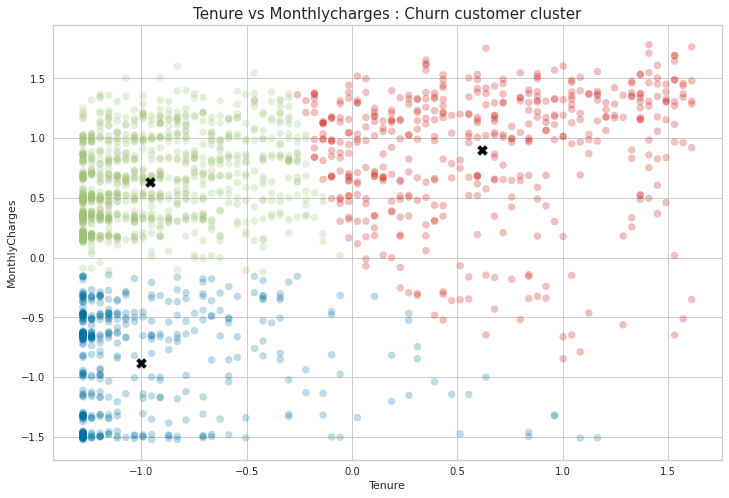

In [ ]:
df_telco_churn['Cluster'] = -1 # by default set Cluster to -1
df_telco_churn.loc[(df_telco_churn.Churn==1),'Cluster'] = Kmeans_cluster_graph(df_telco_churn
                    ,df_telco_churn[df_telco_churn.Churn==1][['Tenure_norm','MonthlyCharges_norm']]
                    ,3
                    ,'Tenure'
                    ,'MonthlyCharges'
                    ,"Tenure vs Monthlycharges : Churn customer cluster")

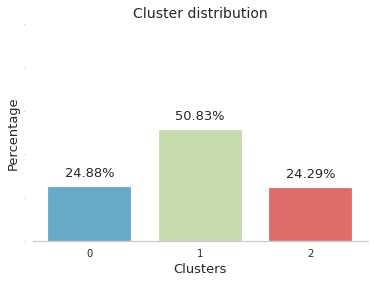

In [ ]:
# Distribution of clusters
churn_distribution =  df_telco_churn[df_telco_churn['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph(x= churn_distribution.index, y = churn_distribution.values, 
                   x_title = 'Clusters', y_title = 'Percentage', 
                   chart_title = 'Cluster distribution', color = plotColor)

**Berdasarkan grafik cluster K-means, kita dapat melihat bahwa ada tiga kelompok.**

1. Tenure Rendah dan Biaya Bulanan Tinggi (Green cluster)
2. Tenure Tinggi dan Biaya Bulanan Tinggi (cluster Merah)
3. Tenure Rendah dan Biaya Bulanan Rendah (Blue cluster)

Dan dari grafik distribusi menunjukkan bahwa sekitar 50% pelanggan termasuk dalam cluster **Low Tenure** dan **High Monthly Charges**.

Mari kita periksa Masa Kerja rata-rata dan Biaya Bulanan berdasarkan cluster.

In [ ]:
# Display the comparison of the MonthlyIncome variable from the Department variable
df_cluster_gp = df_telco_churn[df_telco_churn['Churn']==1]
pd.pivot_table(data=df_cluster_gp,index=['Cluster'],values=['TenureMonths','MonthlyCharges'],aggfunc='mean')\
.style.set_properties(**{'background-color': 'blue','color': 'white'})

,MonthlyCharges,TenureMonths
Cluster,,
0,38.329140,7.808602
1,83.795000,8.805263
2,91.855837,47.592511


Berdasarkan informasi terkait demografi/penggunaan/akun, kita telah mencoba untuk mengeksplorasi karakteristik pelanggan churn oleh setiap cluster.

Misalnya, dalam keseluruhan pelanggan churn, persentase perempuan adalah 50,2%. Dan pada klaster 2 (masa kerja rendah dan biaya bulanan tinggi), persentase perempuan adalah 53,15%. Berarti perempuan lebih cenderung meninggalkan perusahaan karena biaya bulanan yang tinggi dan masa kerja yang lebih rendah.

Dengan menggunakan teknik ini, kita juga telah menjelajahi variabel lain.

In [ ]:
def Extract_highest_in_cluster(df_telco_churn, df_cluster, feature, tenure_charges_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    df = df_telco_churn.copy()
    feature_churn_dist = df[(df['Churn']==1)][feature].value_counts(normalize=True).reset_index()
    feature_churn_dist.columns = [feature,'Percentage']
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    tenure_MonthlyCharges_df = df_telco_churn[df_telco_churn['Churn']==1].groupby(['Cluster',feature],as_index=False)['TenureMonths','MonthlyCharges'].mean()
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
      for i, label in enumerate(feature_churn_dist[feature].unique()):
          cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
          feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
          
          if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
              if((feature_val.values[0] < cluster_val.values[0])):
                  
                  tenure_charges_cluster_df = tenure_charges_cluster_df.append(pd.DataFrame({'Category':feature
                          , 'Label_value_actually': ("Not have a "+ feature) if (df_telco_churn[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_telco_churn[feature].dtypes == 'int64') & (label == 1) else label)
                          , 'Percentage': cluster_val.values[0]
                          , 'Cluster' : cluster
                          , 'Avg_Tenure': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['TenureMonths'].values[0],2)
                          , 'Avg_MonthlyCharges': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['MonthlyCharges'].values[0],2)
                          , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                          , 'Label_in_graph' :  feature if (df_telco_churn[feature].dtypes == 'int64') else label
                          }
                      , index = [len(tenure_charges_cluster_df)])
                      )  
    return tenure_charges_cluster_df

In [ ]:
tenure_charges_cluster_df = pd.DataFrame()

features = ['Gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetServiceType','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'Contract','PaperlessBilling','PaymentMethod','InternetService']

df_cluster_gp = df_telco_churn[df_telco_churn['Churn']==1].groupby('Cluster')

for feature in features:
  tenure_charges_cluster_df = Extract_highest_in_cluster(df_telco_churn, df_cluster_gp, feature,tenure_charges_cluster_df)

# **Cluster 1 - Low Tenure and Low Monthly Charges**

In [ ]:
tenure_charges_cluster_0 = tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==0]
pd.pivot_table(data=tenure_charges_cluster_0,index=['Category', 'Label_value_actually', 'Label_in_graph', 'Represent_in_graph'],
               values=['Percentage','Avg_Tenure','Avg_MonthlyCharges'],aggfunc='mean')\
               .style.set_properties(**{'background-color': '#33F9FF','color': 'black'})

# **Cluster 2 - Low Tenure and High Monthly Charges**

In [ ]:
tenure_charges_cluster_1 = tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==1]
pd.pivot_table(data=tenure_charges_cluster_1,index=['Category', 'Label_value_actually', 'Label_in_graph', 'Represent_in_graph'],
               values=['Percentage','Avg_Tenure','Avg_MonthlyCharges'],aggfunc='mean')\
               .style.set_properties(**{'background-color': '#338AFF','color': 'white'})

,,,,Avg_MonthlyCharges,Avg_Tenure,Percentage
Category,Label_value_actually,Label_in_graph,Represent_in_graph,,,
Contract,Month-to-month,Month-to-month,1,83.760000,8.660000,0.983158
Dependents,Not have a Dependents,Dependents,0,83.870000,8.790000,0.957895
DeviceProtection,Not have a DeviceProtection,DeviceProtection,0,81.480000,8.070000,0.749474
Gender,Female,Female,1,83.470000,8.470000,0.531579
InternetService,Fiber optic,Fiber optic,1,84.470000,8.690000,0.956842
InternetServiceType,Have a InternetServiceType,InternetServiceType,1,83.800000,8.810000,1.000000
MultipleLines,Have a MultipleLines,MultipleLines,1,87.300000,10.570000,0.492632
OnlineBackup,Not have a OnlineBackup,OnlineBackup,0,82.290000,7.940000,0.776842
OnlineSecurity,Not have a OnlineSecurity,OnlineSecurity,0,83.390000,8.300000,0.892632


# **Cluster 3 - High Tenure and High Monthly Charges**

In [ ]:
tenure_charges_cluster_2 = tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==2]
pd.pivot_table(data=tenure_charges_cluster_2,index=['Category', 'Label_value_actually', 'Label_in_graph', 'Represent_in_graph'],
               values=['Percentage','Avg_Tenure','Avg_MonthlyCharges'],aggfunc='mean')\
               .style.set_properties(**{'background-color': '#BB33FF','color': 'black'})

In [ ]:
# Drop unnecessary column 
df_telco_churn = df_telco_churn.drop(['Tenure_norm','MonthlyCharges_norm'], axis=1)
df_telco_churn

,CustomerID,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,...,TotalCharges,Churn,ChurnScore,CLTV,ChurnReason,ChurnReasonType,InternetServiceType,PaymentMethodType,IsContracted,Cluster
0,3668-QPYBK,0,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,0,0,0,...,108.15,1,86,3239,Competitor made better offer,0,1,2,0,0
1,9237-HQITU,0,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,0,0,1,...,151.65,1,67,2701,Moved,1,1,2,0,1
2,9305-CDSKC,0,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,0,0,1,...,820.50,1,86,5372,Moved,1,1,2,0,1
3,7892-POOKP,0,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,0,1,1,...,3046.05,1,84,5003,Moved,1,1,2,0,2
4,0280-XJGEX,0,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,0,0,1,...,5036.30,1,89,5340,Competitor had better devices,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,731,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,0,0,0,...,1419.40,0,45,5306,No Reason,20,0,0,1,-1
7039,6840-RESVB,71,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,0,1,1,...,1990.50,0,59,2140,No Reason,20,1,2,1,-1
7040,2234-XADUH,395,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,0,1,1,...,7362.90,0,71,5560,No Reason,20,1,1,1,-1
7041,4801-JZAZL,396,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,0,1,1,...,346.45,0,59,2793,No Reason,20,1,2,0,-1


# **=== > Correlation Analysis**

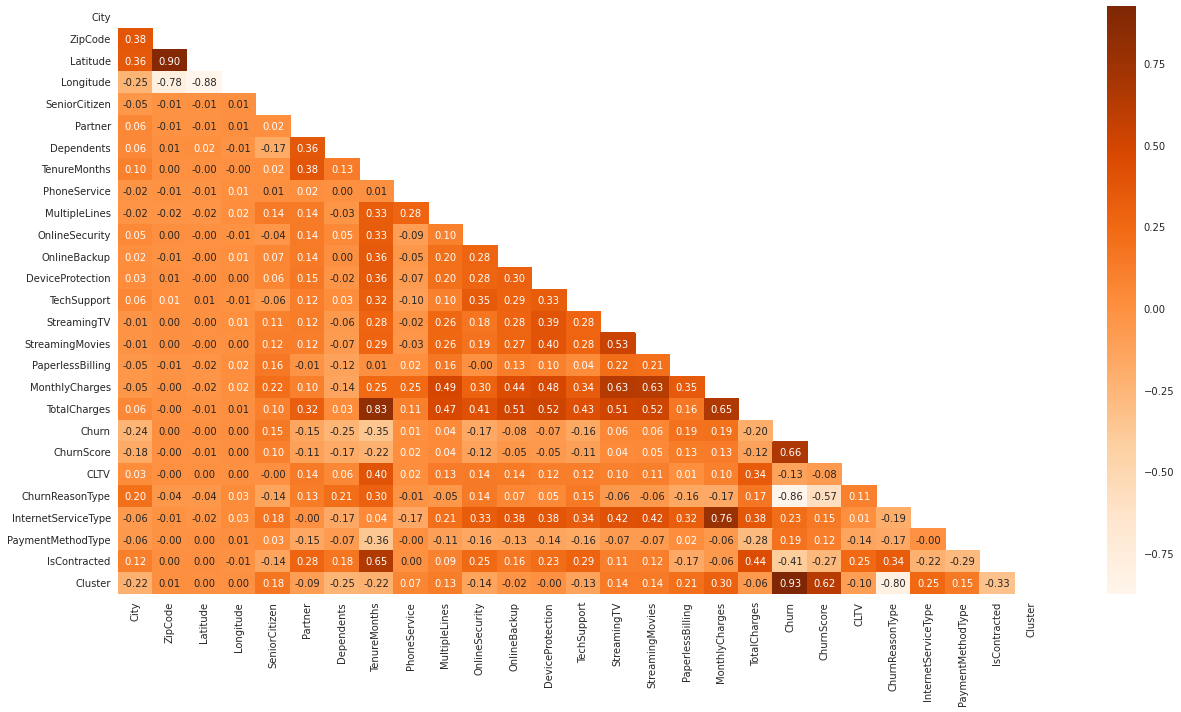

In [ ]:
# Visualization of correlation relationships
variable_corr = df_telco_churn.corr()
plt.figure(figsize=(18, 10))
mask = np.triu(variable_corr)
sns.heatmap(variable_corr,cmap="Oranges",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()
plt.show()

Dari matriks korelasi, fitur seperti **Tenure**, **MonthlyCharges**, dan **TotalCharges** sangat berkorelasi dengan layanan seperti **MultipleLines**, **PhoneServies** dan layaran internet seperti **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** dan layanan **StreamingMovies**.

# **STEP # 5 DATA MODELING DAN EVALUASI**

Langkah-langkah Modeling terdiri dari:
1.   Shuffle Data
2.   One Hot Encoding untuk kolom yang bertipe nominal
3.   Merge fitur-fitur yang memiliki tipe data berbeda menjadi 1 data kesatuan
4.   Normalisasi fitur
5.   Menentukan varibel X (independent) dan Y (dependent)
5.   Train Test Split
6.   Modeling : Menggunakan Baseling Model dan dengan penambahan Teknik SMOTE
7.   Evaluasi


In [ ]:
# Define category variables
category_cols = ['Gender','Partner','Dependents','SeniorCitizen','PhoneService',
                'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'IsContracted','Contract','PaperlessBilling','PaymentMethod', 
                 'Cluster']

# Define numerical variables
numeric_cols = ['TenureMonths','MonthlyCharges','TotalCharges','CLTV','ChurnScore']

# Define target
target_col = 'Churn'


# Spliting categorical columns into Nominal and Binary columns
nominal_cols = ['Gender','InternetService','PaymentMethod','Contract', 'Cluster']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling',
               'InternetServiceType','IsContracted']

In [ ]:
def data_shuffle(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def onehot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def merged_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def df_normilze(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = merged_df(df , [col_cols, num_cols, target_col])
    df_model = data_shuffle(df_model)
    df_model = onehot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = df_normilze(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def train_test_split_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                            ,target
                            ,test_size= test_size
                            ,random_state= random_state)

In [ ]:
df_model_feature ,df_model_target = create_model_df(df_telco_churn,
                                                    category_cols,
                                                    nominal_cols,
                                                    binary_cols,
                                                    numeric_cols, 
                                                    [target_col])

x_train, x_test, y_train, y_test = train_test_split_df(df_model_feature, 
                                                       df_model_target, 
                                                       test_size = 0.2)

print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (7043, 30)
Original target shape,  (7043,)
x train shape,  (5634, 30)
y train shape,  (5634,)
x test shape,  (1409, 30)
y test shape,  (1409,)
----------------------------


In [ ]:
def Telco_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    # Model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    # Roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("AUC Score:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    # Plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    # Plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        # Plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        # Subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        # Subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    print("\n\n")
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [ ]:
# Import SKLearn Libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Implementasi Model SKLearn terdiri dari :
1.  Logistic Regression --> Klasifikasi Model
2.  Decision Tree  --> Klasifikasi Model
3.  Gaussian Naive Bayes --> Klasifikasi Model
4.  Random Forest --> Ensemble Model
5.  K-Neighborhood --> Klasifikasi Model
6.  SVM --> Klasifikasi Model
7.  AdaBoost --> Ensemble Model
8.  GradientBoosting --> Ensemble Model


# **BASELINE MODEL**

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1028
           1       0.87      0.85      0.86       381

    accuracy                           0.93      1409
   macro avg       0.91      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Accuracy Score: 0.9261887863733144
AUC Score: 0.9031628828497605 



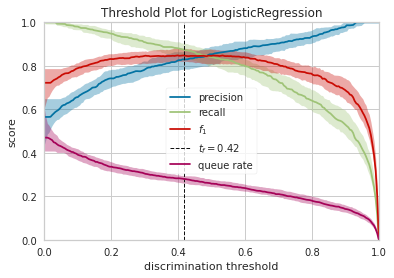

In [ ]:
# Baseline Logistic Regeression
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

Telco_churn_prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

In [ ]:
def Treeplot(classifier, cols, classnames):
    # Plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True))
    display(graph)

# Plot decision tree
cols = [i for i in df_model_feature.columns if i not in target_col]
target_col = ['Churn']

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1028
           1       0.86      0.88      0.87       381

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Accuracy Score: 0.9283179559971612
AUC Score: 0.9137075278041606 



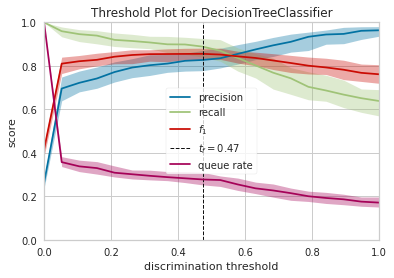

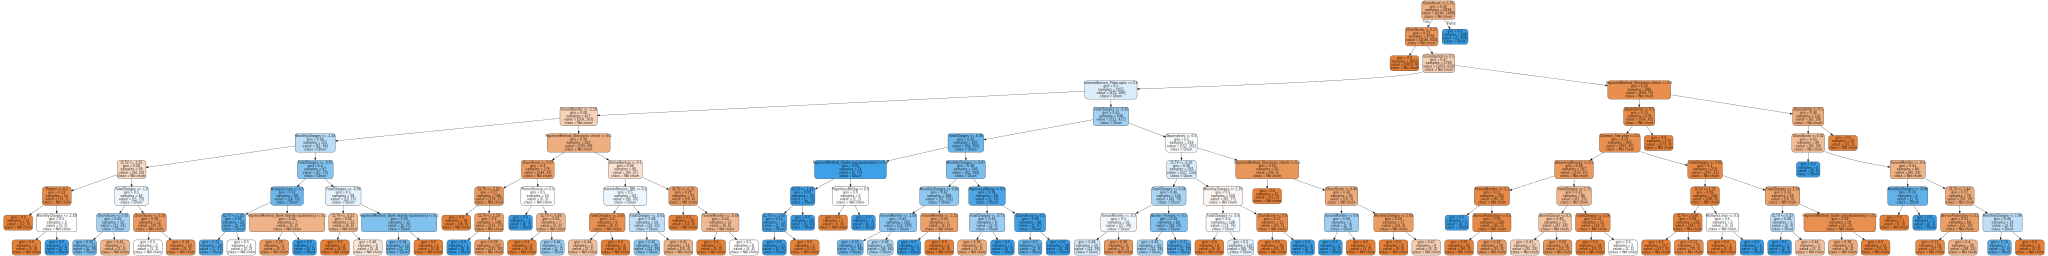

In [ ]:
# Baseline Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

Telco_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)
print("\n\n")

Treeplot(decision_tree, cols, ["Not churn", "Churn"])

Algorithm: KNeighborsClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1028
           1       0.82      0.80      0.81       381

    accuracy                           0.90      1409
   macro avg       0.87      0.86      0.87      1409
weighted avg       0.90      0.90      0.90      1409

Accuracy Score: 0.8963804116394606
AUC Score: 0.864563865314501 



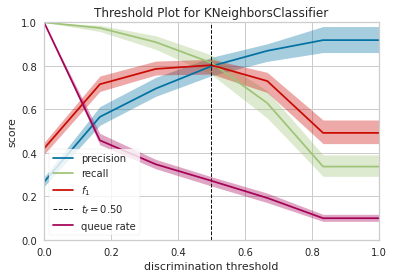

In [ ]:
# Baseline K Nearest Neighbor
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')

Telco_churn_prediction(knn, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1028
           1       0.90      0.87      0.89       381

    accuracy                           0.94      1409
   macro avg       0.93      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409

Accuracy Score: 0.9389638041163946
AUC Score: 0.9168734744732785 



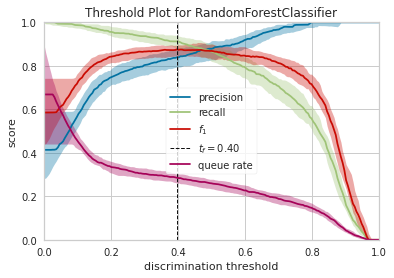

In [ ]:
# Baseline Random Forest
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

Telco_churn_prediction(rfc, x_train, x_test, y_train, y_test, 'features', threshold_plot=True)

Algorithm: GaussianNB

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1028
           1       0.68      0.83      0.75       381

    accuracy                           0.85      1409
   macro avg       0.81      0.84      0.82      1409
weighted avg       0.86      0.85      0.85      1409

Accuracy Score: 0.8502484031227822
AUC Score: 0.843686489577908 



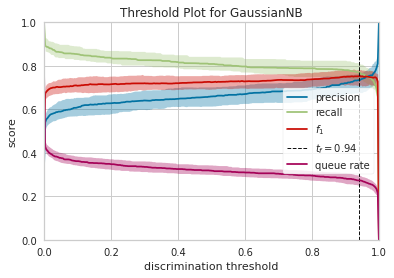

In [ ]:
# Baseline Gaussian Naive Bayes
gnb = GaussianNB(priors=None)

Telco_churn_prediction(gnb, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1028
           1       0.86      0.87      0.87       381

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Accuracy Score: 0.9268985095812633
AUC Score: 0.907779037347958 



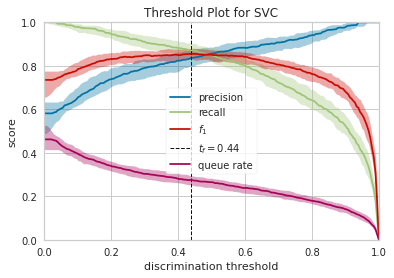

In [ ]:
# Baseline Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

Telco_churn_prediction(svc_lin, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1028
           1       0.85      0.83      0.84       381

    accuracy                           0.91      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409

Accuracy Score: 0.9134137686302342
AUC Score: 0.8878003819561465 



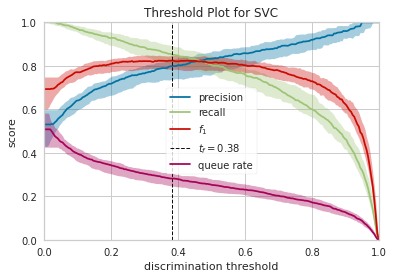

In [ ]:
# Baseline Support vector classifier using non-linear hyper plane ("rbf")
svc_rbf  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

Telco_churn_prediction(svc_rbf, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

Algorithm: AdaBoostClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1028
           1       0.88      0.86      0.87       381

    accuracy                           0.93      1409
   macro avg       0.92      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Accuracy Score: 0.9318665720369056
AUC Score: 0.9103577519736104 



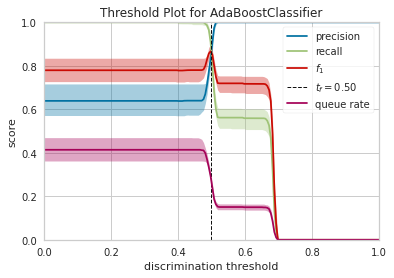

In [ ]:
# Baseline AdaBoost
adac = AdaBoostClassifier(random_state=124)

Telco_churn_prediction(adac, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

Algorithm: GradientBoostingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1028
           1       0.89      0.87      0.88       381

    accuracy                           0.94      1409
   macro avg       0.92      0.91      0.92      1409
weighted avg       0.93      0.94      0.94      1409

Accuracy Score: 0.9354151880766501
AUC Score: 0.9136156132234444 



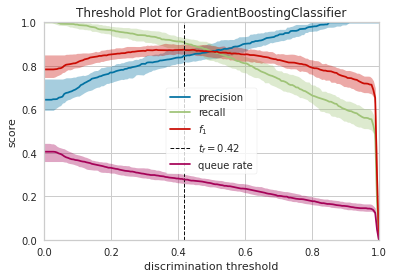

In [ ]:
# Baseline Gradient Boosting
gbc = GradientBoostingClassifier(random_state=124)

Telco_churn_prediction(gbc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

# **BASELINE MODEL + SMOTE**

In [ ]:
# Upsampling using SMOTE
sm = SMOTE(random_state = random_state, sampling_strategy = 1.0)
x_train_sm , y_train_sm = sm.fit_resample(x_train,y_train)
x_smote = pd.DataFrame(data = x_train_sm, columns=cols)
y_smote = pd.DataFrame(data = y_train_sm, columns=target_col)

print("----------------------------")
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", x_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (5634, 30)
Resample x train shape,  (8292, 30)
----------------------------


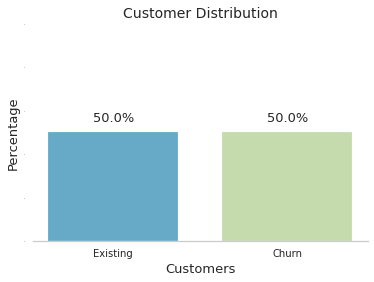

In [ ]:
# After upsampling distribution in train dataset
Churn_rate = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')


Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1028
           1       0.81      0.89      0.85       381

    accuracy                           0.91      1409
   macro avg       0.88      0.91      0.89      1409
weighted avg       0.92      0.91      0.91      1409

Accuracy Score: 0.9134137686302342
AUC Score: 0.9067973385622518 



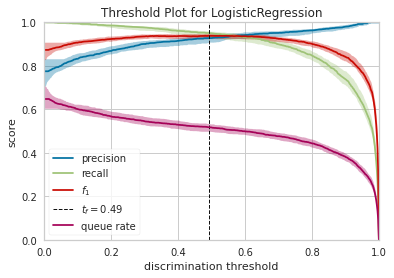

In [ ]:
# Logistic Regression + SMOTE
logit_sm = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

Telco_churn_prediction(logit_sm, x_train_sm, x_test, y_train_sm, y_test, "coefficients", threshold_plot=True)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1028
           1       0.79      0.93      0.85       381

    accuracy                           0.91      1409
   macro avg       0.88      0.92      0.90      1409
weighted avg       0.92      0.91      0.92      1409

Accuracy Score: 0.9141234918381831
AUC Score: 0.9180211301408334 



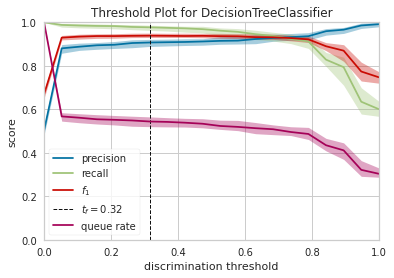

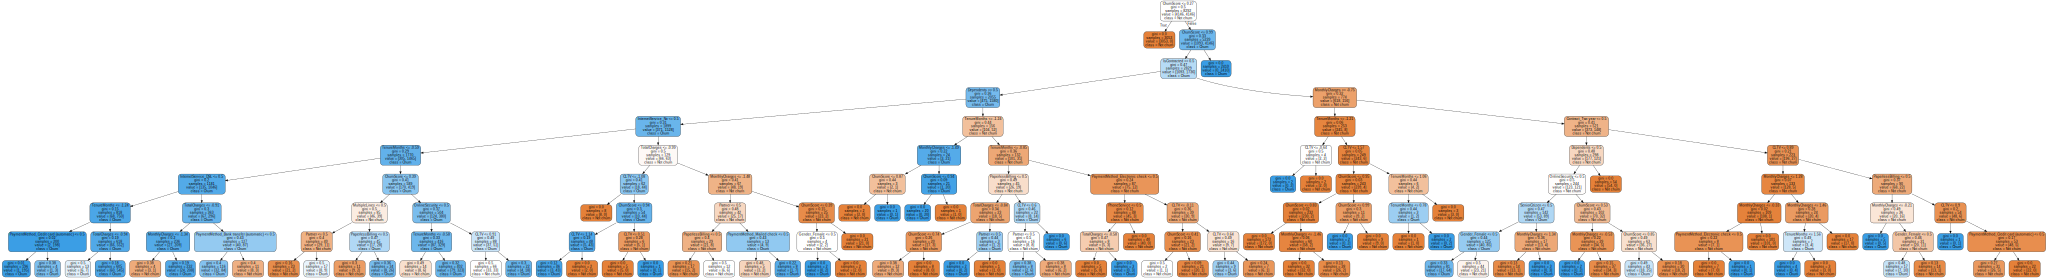

In [ ]:
# Decision Tree + SMOTE
decision_tree_sm = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

Telco_churn_prediction(decision_tree_sm, x_train_sm, x_test, y_train_sm, y_test, "features", threshold_plot=True)
print("\n\n")

Treeplot(decision_tree_sm, cols, ["Not churn", "Churn"])

Algorithm: KNeighborsClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      1028
           1       0.69      0.88      0.78       381

    accuracy                           0.86      1409
   macro avg       0.82      0.87      0.84      1409
weighted avg       0.88      0.86      0.87      1409

Accuracy Score: 0.8637331440738112
AUC Score: 0.8702727820501037 



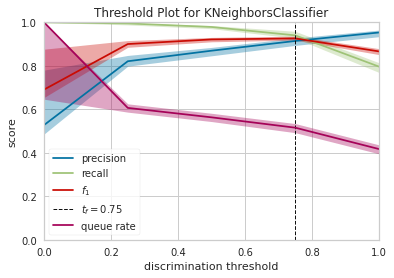

In [ ]:
# K Nearest Neighbor + SMOTE
knn_sm = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')

Telco_churn_prediction(knn_sm, x_train_sm, x_test, y_train_sm, y_test, 'None', threshold_plot=True)

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1028
           1       0.80      0.94      0.87       381

    accuracy                           0.92      1409
   macro avg       0.89      0.93      0.91      1409
weighted avg       0.93      0.92      0.92      1409

Accuracy Score: 0.9212207239176721
AUC Score: 0.928666625815742 



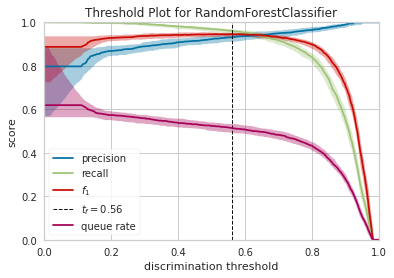

In [ ]:
# Random Forest + SMOTE
rfc_sm = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

Telco_churn_prediction(rfc_sm, x_train_sm, x_test, y_train_sm, y_test, 'features', threshold_plot=True)

Algorithm: GaussianNB

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1028
           1       0.69      0.82      0.75       381

    accuracy                           0.85      1409
   macro avg       0.81      0.84      0.82      1409
weighted avg       0.86      0.85      0.85      1409

Accuracy Score: 0.8502484031227822
AUC Score: 0.8403826710377157 



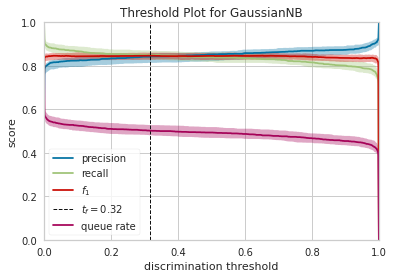

In [ ]:
# Gaussian Naive Bayes + SMOTE
gnb_sm = GaussianNB(priors=None)

Telco_churn_prediction(gnb_sm, x_train_sm, x_test, y_train_sm, y_test, 'None', threshold_plot=True)

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1028
           1       0.82      0.90      0.86       381

    accuracy                           0.92      1409
   macro avg       0.89      0.91      0.90      1409
weighted avg       0.92      0.92      0.92      1409

Accuracy Score: 0.9183818310858765
AUC Score: 0.9110279624580002 



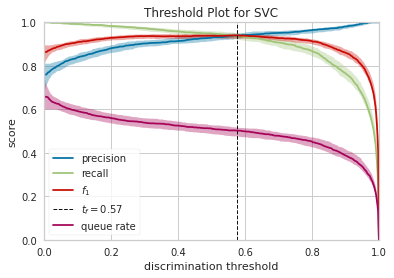

In [ ]:
# Support vector classifier using linear hyper plane + SMOTE
svc_lin_sm  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

Telco_churn_prediction(svc_lin_sm, x_train_sm, x_test, y_train_sm, y_test, "coefficients", threshold_plot=True)

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1028
           1       0.80      0.86      0.83       381

    accuracy                           0.90      1409
   macro avg       0.87      0.89      0.88      1409
weighted avg       0.91      0.90      0.91      1409

Accuracy Score: 0.9041873669268985
AUC Score: 0.8905629257432316 



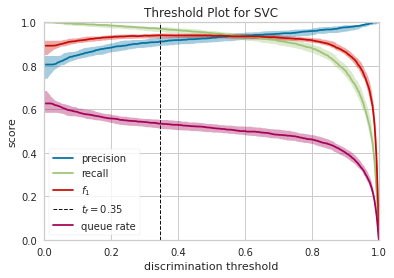

In [ ]:
# Support vector classifier using non-linear hyper plane ("rbf") + SMOTE
svc_rbf_sm  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

Telco_churn_prediction(svc_rbf_sm, x_train_sm, x_test, y_train_sm, y_test, "None", threshold_plot=True)

Algorithm: AdaBoostClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1028
           1       0.81      0.92      0.87       381

    accuracy                           0.92      1409
   macro avg       0.89      0.92      0.91      1409
weighted avg       0.93      0.92      0.92      1409

Accuracy Score: 0.9226401703335699
AUC Score: 0.923031751381272 



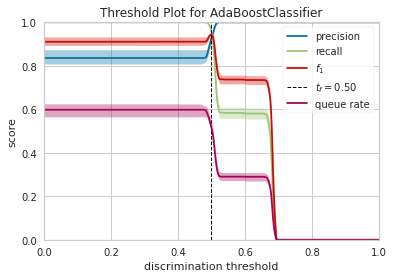

In [ ]:
# AdaBoost + SMOTE
adac_sm = AdaBoostClassifier(random_state=124)

Telco_churn_prediction(adac_sm, x_train_sm, x_test, y_train_sm, y_test, "features", threshold_plot=True)

Algorithm: GradientBoostingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1028
           1       0.81      0.93      0.87       381

    accuracy                           0.92      1409
   macro avg       0.89      0.93      0.91      1409
weighted avg       0.93      0.92      0.92      1409

Accuracy Score: 0.9226401703335699
AUC Score: 0.925509615286416 



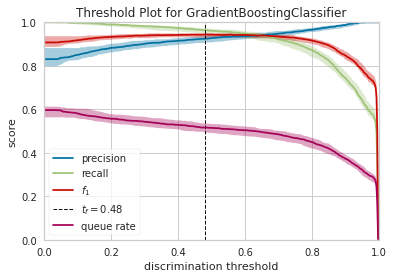

In [ ]:
# Gradient Boosting + SMOTE
gbc_sm = GradientBoostingClassifier(random_state=124)

Telco_churn_prediction(gbc_sm, x_train_sm, x_test, y_train_sm, y_test, "features", threshold_plot=True)

In [ ]:
# Putting all the model names, model classes and the used columns in a dictionary
models = {'Logistic (Baseline)': [logit, cols],
          'Logistic (SMOTE)': [logit_sm, cols], 
          'Decision Tree (Baseline)': [decision_tree, cols], 
          'Decision Tree (SMOTE)': [decision_tree_sm, cols], 
          'KNN Classifier (Baseline)': [knn, cols], 
          'KNN Classifier (SMOTE)': [knn_sm, cols], 
          'Random Forest (Baseline)': [rfc, cols], 
          'Random Forest (SMOTE)': [rfc_sm, cols], 
          'Naive Bayes (Baseline)': [gnb, cols], 
          'Naive Bayes (SMOTE)': [gnb_sm, cols], 
          'SVM linear (Baseline)': [svc_lin, cols], 
          'SVM linear (SMOTE)': [svc_lin_sm, cols], 
          'SVM rbf (Baseline)': [svc_rbf, cols], 
          'SVM rbf (SMOTE)': [svc_rbf_sm, cols], 
          'AdaBoost (Baseline)': [adac, cols], 
          'AdaBoost (SMOTE)': [adac_sm, cols], 
          'GradientBoost (Baseline)': [gbc, cols], 
          'GradientBoost (SMOTE)': [gbc_sm, cols], 
         }

In [ ]:
# Gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)  
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:
# Outputs evaluation of all models, display in tabular form
model_performances = pd.DataFrame() 

key = 'SMOTE'
res = dict(filter(lambda item: key in item[0], models.items()))

for name in models:
    if name in res :
        model_performances = model_performances.append(model_report(models[name][0], 
                                                                    x_smote[models[name][1]], 
                                                                    x_test[models[name][1]], 
                                                                    y_smote, y_test, name), ignore_index=True)
    else:
        model_performances = model_performances.append(model_report(models[name][0], 
                                                                    x_train[models[name][1]], 
                                                                    x_test[models[name][1]], 
                                                                    y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances, 4))
py.iplot(table_train)

In [ ]:
# Function to make plot evaluation of each models
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],x = df[metric],
                    orientation = "h", name = metric,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [ ]:
modelmetricsplot(df=model_performances, title="Performances Various Model Machine Learning ")

In [ ]:
# Function to make evaluation confusion matrix
def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        key = 'SMOTE'
        res = dict(filter(lambda item: key in item[0], models.items()))
        if name in res:
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)

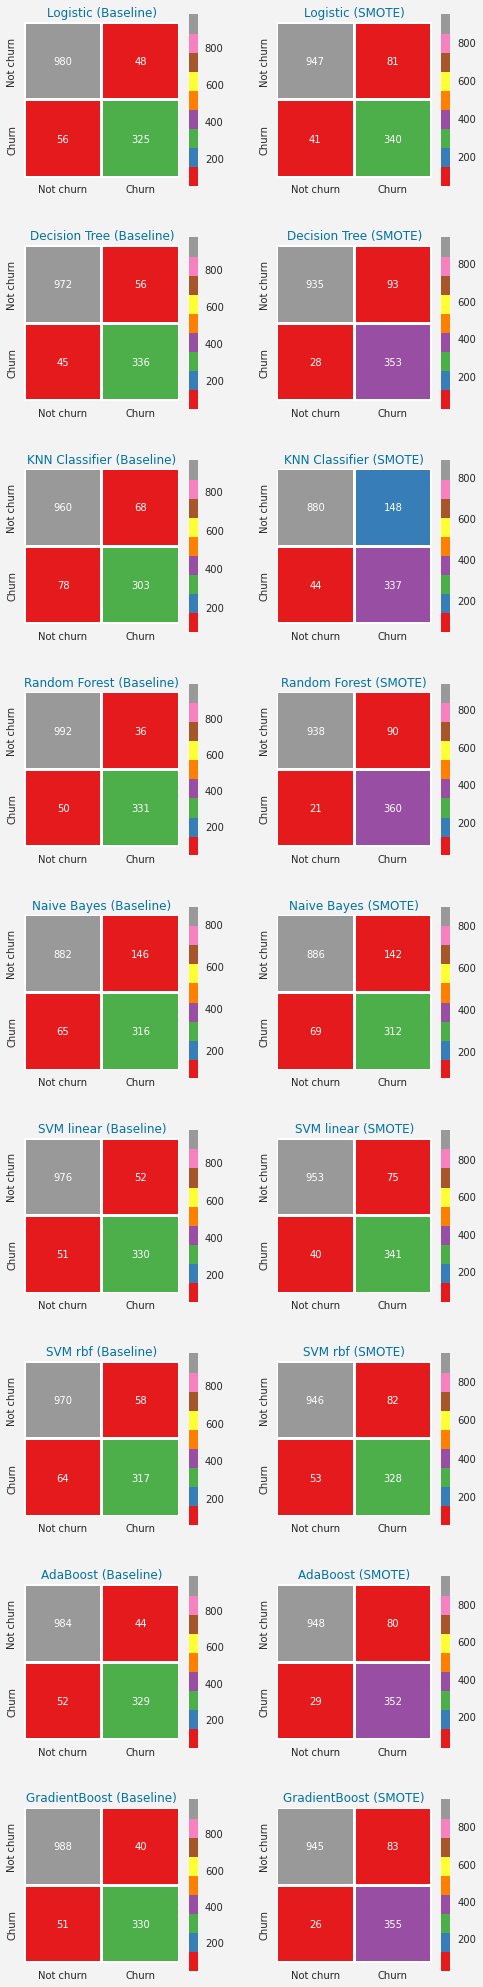

In [ ]:
confmatplot(modeldict=models, df_train=[x_train, x_train_sm], df_test=x_test, 
            target_train=[y_train, y_train_sm], target_test=y_test, figcolnumber=2)

# **CONCLUSION**

* Dari keseluruhan model Machine Learning menunjukkan nilai AUC score dan ROC AUC score tertinggi ada pada model Random Forest dengan Teknik SMOTE. Sedangkan untuk akurasi tertinggi ada pada model Random Forest Baseline.
* Dari hasil Confusion Matrix model dengan Teknik SMOTE menghasilkan hasil prediksi yang lebih baik dibanding model Baseline. Seperti contoh pada model Random Forest Baseline dimana data aktual **"Churn"** dan terprediksi tepat oleh sistem sebagai kelas **"Churn"** hanya sebanyak 331 sedangkan pada model Random Forest dengan Teknik SMOTE dimana data aktual **"Churn"** dan terprediksi tepat oleh sistem sebagai kelas **"Churn"** sebanyak 360. Dari hal ini, menunjukkan bahwa dengan menerapkan Teknik SMOTE membantu mengetahui jumlah pasti pelanggan berisiko tinggi yang akan melakukan **"Churn"**.


<br>
<br>

#### **Why customers leaving the company**?
Alasan di balik pelanggan meninggalkan perusahaan bisa jadi
- Biaya tinggi
- Tawaran yang lebih baik dari pesaing
- Layanan pelanggan yang buruk
- Beberapa alasan yang tidak diketahui

#### **How to detect the churn customer**? 

- Pemantauan penggunaan
- Menganalisa keluhan
- Menganalisis penawaran pesaing

#### **How to prevent customers from leaving a company**?

Setelah Anda mendeteksi pelanggan berisiko tinggi, terapkan
- Rencana retensi
- Meningkatkan layanan pelanggan